In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [5]:
df1 = df.copy()

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Gender'] = le.fit_transform(df1[['Gender']])

In [7]:
df1.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [8]:
x = df1.drop('Weight', axis=1)
y = df1[['Weight']]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 1)

# Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [11]:
lr.fit(x_train, y_train)

LinearRegression()

In [12]:
# prediction for xtest
y_pred = lr.predict(x_test)

In [13]:
z = lr.predict([[1, 74.11]])
z

array([[217.1440648]])

In [14]:
# check accuracy for linear regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [15]:
mean_squared_error(y_test, y_pred)

99.67250998070034

In [16]:
# Accuracy score for regression, we use score(x,y)
lr.score(x_test,y_test) * 100   

90.5995960709116

# KNN Regressor - weights = 'uniform' (default)

In [17]:
# KNN regressor
from sklearn.neighbors import KNeighborsRegressor

In [18]:
# Finding optimal value of k
knn_err = []
k_range = range(1,500)

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors= k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    err = mean_squared_error(y_test, y_pred)
    knn_err.append(err)

In [19]:
from kneed import KneeLocator
kn = KneeLocator(k_range, knn_err, curve='convex', direction='decreasing')
kn.knee

22

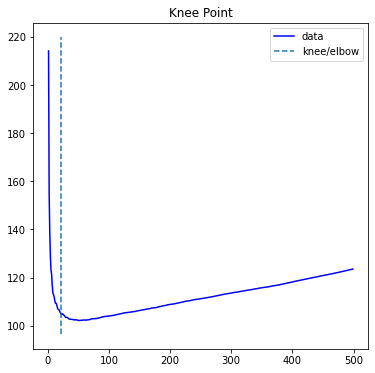

In [20]:
kn.plot_knee()

In [21]:
# So, the optimal value of k is 22

In [22]:
knn = KNeighborsRegressor(n_neighbors= 22)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=22)

In [23]:
knn.predict([[1, 74.11]])

array([[214.94814497]])

In [24]:
y_pred = knn.predict(x_test)
y_pred

array([[145.14391231],
       [198.02779449],
       [184.11868734],
       ...,
       [158.84652788],
       [186.46844938],
       [199.64578323]])

In [25]:
mean_squared_error(y_test, y_pred)

104.68838897461997

In [26]:
# Accuracy
knn.score(x_test, y_test)

0.9012653395366981

# KNN Regression - weights='distance'

In [27]:
knn_err = []
k_range = range(1,500)

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors= k, weights='distance')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    err = mean_squared_error(y_test, y_pred)
    knn_err.append(err)

In [28]:
from kneed import KneeLocator
kn = KneeLocator(k_range, knn_err, curve='convex', direction='decreasing')
kn.knee

34

In [29]:
knn = KNeighborsRegressor(n_neighbors= 34)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=34)

In [30]:
knn.predict([[1, 74.11]])

array([[216.74340741]])

In [31]:
y_pred = knn.predict(x_test)
y_pred

array([[144.59446515],
       [198.58966785],
       [183.30865721],
       ...,
       [159.50341954],
       [185.9682749 ],
       [199.50699486]])

In [32]:
# Accuracy
knn.score(x_test, y_test)

0.9029953189109822

# KNN Classification

In [33]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [34]:
x = df.drop('Gender', axis=1)

In [35]:
x.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [36]:
y = df[['Gender']]

In [37]:
y.head()

,Gender
0,Male
1,Male
2,Male
3,Male
4,Male


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [39]:
y_train.head()

,Gender
1277,Male
5361,Female
5728,Female
4276,Male
3112,Male


In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn_classifier = KNeighborsClassifier()

In [42]:
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [43]:
y_pred = knn_classifier.predict(x_test)

In [44]:
accuracy_score(y_test, y_pred)

0.9146864043630697

In [52]:
# weights = 'distance' :

In [53]:
knn_classifier = KNeighborsClassifier(weights='distance')

In [54]:
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [55]:
y_pred = knn_classifier.predict(x_test)

In [56]:
accuracy_score(y_test, y_pred)

0.905336969224776

In [ ]:
#  So, uniform weights performs better accurcy_score.
N

In [57]:
knn_acc = []
k_range = range(1,500)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k, weights='distance')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    knn_acc.append(accuracy)

In [69]:
kn = KneeLocator(k_range, knn_acc, curve='concave', direction='increasing')
kn.knee

11

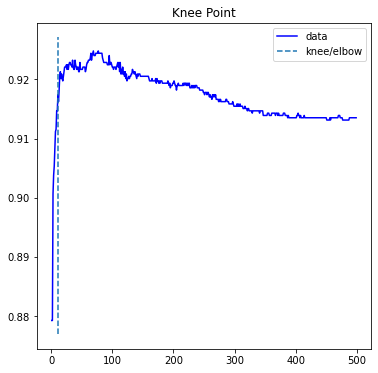

In [70]:
kn.plot_knee()

In [71]:
knn_classifier = KNeighborsClassifier(n_neighbors= 11)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [72]:
y_pred = knn_classifier.predict(x_test)

In [73]:
accuracy_score(y_test, y_pred)

0.9224776003116478